In [7]:
from db.fetch import fetch_table, fetch_todays_articles

fetch_table("categories")
# fetch_table("news_articles")
# print(fetch_todays_articles())
# length = len(fetch_todays_articles())
# print(f"Total articles fetched today: {length}")
# fetch_table("news_sources")

[(1, 'Finance'), (2, 'Sports'), (3, 'Seasonal')]

In [1]:
from agents.fetch_article import fetch_relevant_articles

fetch_relevant_articles("give me top 5 stocks to buy")

c:\Users\91935\vaish\News-Trust-Agent\db\vector_db.py:34: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
c:\Users\91935\vaish\News-Trust-Agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔎 Retrieved relevant articles:
  - Buy or sell: Sumeet Bagadia recommends three stocks to buy on Monday — 6 October 2025 (https://www.livemint.com/market/stock-market-news/buy-or-sell-sumeet-bagadia-recommends-three-stocks-to-buy-on-monday-6-october-2025-11759560096147.html)
  - Stocks to buy under  ₹200: Mehul Kothari of Anand Rathi recommends three shares to buy or sell (https://www.livemint.com/market/stock-market-news/stocks-to-buy-under-rs-200-mehul-kothari-of-anand-rathi-recommends-three-shares-to-buy-or-sell-11759565607509.html)
  - Stock market this week: Top gainers and losers that moved Nifty and Sensex (https://www.livemint.com/market/stock-market-news/weekend-wrap-october-3-stock-market-bse-nse-top-gainers-and-losers-mutual-funds-ipo-nfo-nifty50-elss-11759484827306.html)
  - Tata Capital’s IPO Draws Goldman Sachs, Morgan Stanley Funds (https://www.livemint.com/market/ipo/tata-capital-s-ipo-draws-goldman-sachs-morgan-stanley-funds-11759519814542.html)
  - Retail investors bo

[Document(id='5062be9c-e268-4a36-8319-a907aa89f6b2', metadata={'article_id': 41, 'title': 'Buy or sell: Sumeet Bagadia recommends three stocks to buy on Monday — 6 October 2025', 'url': 'https://www.livemint.com/market/stock-market-news/buy-or-sell-sumeet-bagadia-recommends-three-stocks-to-buy-on-monday-6-october-2025-11759560096147.html', 'published_at': '2025-10-04 12:25:05'}, page_content='Buy or sell: Sumeet Bagadia recommends three stocks to buy on Monday — 6 October 2025\n\nBuy or sell: Sumeet Bagadia recommends three stocks to buy on Monday — Tata Steel, NBCC, BHEL'),
 Document(id='abadb20d-2f60-48a8-a297-f102cf995cba', metadata={'article_id': 40, 'title': 'Stocks to buy under  ₹200: Mehul Kothari of Anand Rathi recommends three shares to buy or sell', 'url': 'https://www.livemint.com/market/stock-market-news/stocks-to-buy-under-rs-200-mehul-kothari-of-anand-rathi-recommends-three-shares-to-buy-or-sell-11759565607509.html', 'published_at': '2025-10-04 13:51:15'}, page_content='S

c:\Users\91935\vaish\News-Trust-Agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🚀 Building LangGraph workflow...


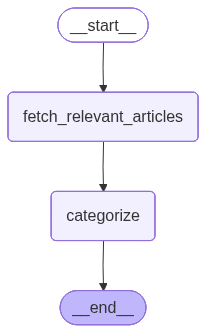

In [1]:
# from langgraph.graph import StateGraph, START, END, MessagesState
# from agents.fetch_article import fetch_relevant_articles
# from agents.categorizer import categorize_node
# from IPython.display import Image, display


# class State(MessagesState):
#     article_id: int
#     query: str = "give me top 5 stocks to buy"
#     title: str
#     content: str
#     summary: str = ""  # optional field


# if __name__ == "__main__":

#     # Step 2: build LangGraph workflow
#     graph = StateGraph(State)
#     graph.add_node("fetch_relevent_articles", fetch_relevant_articles)
#     graph.add_node("categorize", categorize_node)
#     graph.add_edge(START, "fetch_relevent_articles")
#     graph.add_edge("fetch_relevent_articles", "categorize")
#     graph.add_edge("categorize", END)

#     graph = graph.compile()
#     display(Image(graph.get_graph().draw_mermaid_png()))

from langgraph.graph import StateGraph, START, END, MessagesState
from agents.fetch_article import fetch_relevant_articles
from agents.categorizer import categorize_node
from IPython.display import Image, display
from mlflow_client import mlflow_client

mlflow_client()


# ✅ Define shared state model
class State(MessagesState):
    article_id: int | None = None
    query: str = "give me top 5 stocks to buy"
    title: str | None = None
    content: str | None = None
    summary: str = ""
    category: str | None = None
    confidence: float | None = None


if __name__ == "__main__":
    print("🚀 Building LangGraph workflow...")

    # ✅ Step 1: Build the graph structure
    graph = StateGraph(State)

    # Add nodes (functions)
    graph.add_node("fetch_relevant_articles", fetch_relevant_articles)
    graph.add_node("categorize", categorize_node)

    # Define edges (workflow order)
    graph.add_edge(START, "fetch_relevant_articles")
    graph.add_edge("fetch_relevant_articles", "categorize")
    graph.add_edge("categorize", END)

    # ✅ Step 2: Compile graph
    graph = graph.compile()

    # Optional visualization (if in Jupyter or IPython)
    try:
        display(Image(graph.get_graph().draw_mermaid_png()))
    except Exception:
        pass





In [5]:
# state= State(
#     query="give me top 5 stocks to buy"
# )

# result = graph.invoke(state)
# print("✅ Categorization Result:", result)
 # ✅ Step 3: Run the workflow
state = State(query="give me top 5 stocks to buy")
print("🧭 Starting workflow with query:", state["query"])

result = graph.invoke(state)

print("\n✅ Final Categorization Result:")
print("--------------------------------")
# print(f"Article ID: {result["article_id"]}")
# print(f"Title: {result["title"]}")
# print(f"Category: {result["category"]}")
# print(f"Confidence: {result["confidence"]}")
print(result)


🧭 Starting workflow with query: give me top 5 stocks to buy
🔎 Fetching relevant articles for query: give me top 5 stocks to buy
🔎 Retrieved relevant articles:
  - Buy or sell: Sumeet Bagadia recommends three stocks to buy on Monday — 6 October 2025 (https://www.livemint.com/market/stock-market-news/buy-or-sell-sumeet-bagadia-recommends-three-stocks-to-buy-on-monday-6-october-2025-11759560096147.html)
  - Stocks to buy under  ₹200: Mehul Kothari of Anand Rathi recommends three shares to buy or sell (https://www.livemint.com/market/stock-market-news/stocks-to-buy-under-rs-200-mehul-kothari-of-anand-rathi-recommends-three-shares-to-buy-or-sell-11759565607509.html)
  - Stock market this week: Top gainers and losers that moved Nifty and Sensex (https://www.livemint.com/market/stock-market-news/weekend-wrap-october-3-stock-market-bse-nse-top-gainers-and-losers-mutual-funds-ipo-nfo-nifty50-elss-11759484827306.html)
  - Tata Capital’s IPO Draws Goldman Sachs, Morgan Stanley Funds (https://www.

Trace(trace_id=tr-5260263bead122f1b239f4645eee877a)

In [1]:
# from langgraph.graph import MessagesState
# from mlflow_client import mlflow_client

# mlflow_client()

# class State(MessagesState):
#     query: str
#     article_id: int | None = None
#     title: str | None = None
#     content: str | None = None
#     category: str | None = None
#     confidence: float | None = None
#     summary: str | None = None
#     step: str | None = None  # which node last ran

from langgraph.graph import MessagesState
from typing_extensions import Annotated
from langgraph.graph.message import add_messages
from mlflow_client import mlflow_client

mlflow_client()

class State(MessagesState):
    query: Annotated[list, add_messages]  # allow multiple updates (like chat messages)
    article_id: int | None = None
    title: str | None = None
    content: str | None = None
    category: str | None = None
    confidence: float | None = None
    summary: str | None = None
    step: str | None = None



c:\Users\91935\vaish\News-Trust-Agent\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


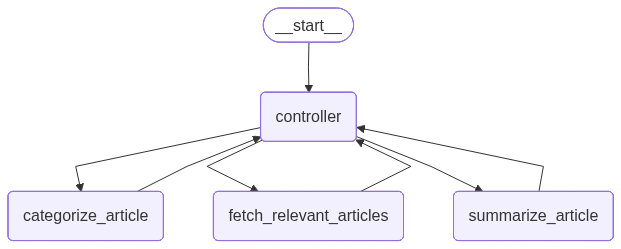

In [2]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from agents.fetch_article import fetch_relevant_articles
from agents.categorizer import categorize_node
from agents.controller import controller_node
from agents.summarizer import summarize_article

graph = StateGraph(State)

# Add nodes
graph.add_node("controller", controller_node)
graph.add_node("fetch_relevant_articles", fetch_relevant_articles)
graph.add_node("categorize_article", categorize_node)
graph.add_node("summarize_article", summarize_article)

# Define flow
graph.add_edge(START, "controller")

# LLM controller decides what comes next
for node in ["fetch_relevant_articles", "categorize_article", "summarize_article"]:
    graph.add_edge("controller", node)
    graph.add_edge(node, "controller")  # after each node, go back to controller

graph.add_edge("controller", END)  # controller can decide to end

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [3]:
state = State(query="give me top 5 stocks to buy")
result = graph.invoke(state)
print("\n✅ Final State:")
print(result)

🤖 Controller deciding next step...
🧭 Controller chose: fetch_relevant_articles
🧠 Categorizing article ID: 101
🔎 Fetching relevant articles for query: [HumanMessage(content='give me top 5 stocks to buy', additional_kwargs={}, response_metadata={}, id='99cf3cb8-c254-4b6f-9398-176bcc88684e')]
📝 Summarizing article...


c:\Users\91935\vaish\News-Trust-Agent\db\vector_db.py:36: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


🧾 Raw LLM Response: ```json
{
  "category": "Other",
  "confidence": 1.0
}
```
(4,)
4
Other
1.0
✅ Saved category 'Other' (confidence: 1.0) for article 101
-----------------------------------------
{'messages': [], 'query': [HumanMessage(content='give me top 5 stocks to buy', additional_kwargs={}, response_metadata={}, id='99cf3cb8-c254-4b6f-9398-176bcc88684e')], 'step': 'categorize'}


AttributeError: 'list' object has no attribute 'replace'

Trace(trace_id=tr-b866ac68c028b451522e0e78678a1cbc)

In [7]:
print(state)
# print(result)

{'query': 'give me top 5 stocks to buy'}


In [10]:
from db.insertion import save_category

save_category(101,"Seasonal", 0.23)

In [1]:
from agents.categorizer import categorize_node
categorize_node()

2025-10-03 17:12:39,320 - INFO - Using direct username/password for MLflow authentication
2025-10-03 17:12:41,014 - INFO - Successfully retrieved auth token


----------------LLM RESPONSE----------:  {
  "category": "Seasonal",
  "confidence": 0.95
}
----------------article_id----------:  101
----------------LLM category----------:  Seasonal
----------------LLM confidence----------:  0.95
(3,)
3
Seasonal
0.95


{'category': 'Seasonal', 'confidence': 0.95}

Trace(trace_id=tr-89d77065c5f7e6f163a101ff5ac6d1ec)

In [1]:
from mlflow_client import mlflow_client
mlflow_client()


In [6]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from mlflow_client import mlflow_client

mlflow_client()

mlflow.enable_system_metrics_logging()

mlflow.sklearn.autolog()

# Generate toy dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# mlflow.log_metric("mse", mse)


# with mlflow.start_run():

#     # Log parameters
#     mlflow.log_param("fit_intercept", model.fit_intercept)

#     # Log metric
#     mlflow.log_metric("mse", mse)

#     # Log the model
#     mlflow.sklearn.log_model(model, artifact_path="model")

#     print("Run ID:", mlflow.active_run().info.run_id)

# mlflow.end_run()



2025/10/03 19:37:05 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 1.3.1 <= scikit-learn <= 1.7.1, but the installed version is 1.7.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2025/10/03 19:37:05 INFO mlflow.system_metrics.system_metrics_monitor: Skip logging GPU metrics. Set logger level to DEBUG for more details.
2025/10/03 19:37:05 INFO mlflow.system_metrics.system_metrics_monitor: Started monitoring system metrics.
2025/10/03 19:37:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b4413be9867e401ea3154234f3114006', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/10/03 19:37:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version speci

🏃 View run grandiose-trout-757 at: http://127.0.0.1:5000/#/experiments/926232657939640394/runs/b4413be9867e401ea3154234f3114006
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/926232657939640394


In [5]:
mlflow.end_run()

🏃 View run gifted-asp-497 at: http://127.0.0.1:5000/#/experiments/926232657939640394/runs/3647338ba5794fef98edbfe323639b31
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/926232657939640394
